In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('cm1.csv')

In [3]:
dataset.head()

,McCabe's line count of code,"McCabe ""cyclomatic complexity”","McCabe ""essential complexity”","McCabe ""design complexity”",Halstead total operators + operands,"Halstead ""volume”","Halstead ""program length”","Halstead ""difficulty”","Halstead ""intelligence”","Halstead ""effort”",...,Halstead's line count,Halstead's count of lines of comments,Halstead's count of blank,lineslOCodeAndComment,unique operators,unique operands,total operators,total operands,branchCount of the flow graph,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   McCabe's line count of code            498 non-null    float64
 1   McCabe "cyclomatic complexity”         498 non-null    float64
 2   McCabe "essential complexity”          498 non-null    float64
 3   McCabe "design complexity”             498 non-null    float64
 4   Halstead total operators + operands    498 non-null    float64
 5   Halstead "volume”                      498 non-null    float64
 6   Halstead "program length”              498 non-null    float64
 7   Halstead "difficulty”                  498 non-null    float64
 8   Halstead "intelligence”                498 non-null    float64
 9   Halstead "effort”                      498 non-null    float64
 10  Halstead                               498 non-null    float64
 11  Halste

In [5]:
X = dataset.iloc[:,:-1].values


In [6]:
X

array([[  1.1,   1.4,   1.4, ...,   1.2,   1.2,   1.4],
       [  1. ,   1. ,   1. , ...,   1. ,   1. ,   1. ],
       [ 24. ,   5. ,   1. , ...,  44. ,  19. ,   9. ],
       ...,
       [ 82. ,  11. ,   3. , ..., 285. , 190. ,  21. ],
       [ 10. ,   2. ,   1. , ...,  19. ,  13. ,   3. ],
       [ 28. ,   6. ,   5. , ...,  67. ,  37. ,  11. ]])

In [7]:
X=X[400:498,:]


In [8]:
X

array([[  4.,   1.,   1., ...,   4.,   1.,   1.],
       [  9.,   2.,   1., ...,  10.,   5.,   3.],
       [ 16.,   1.,   1., ...,  49.,  39.,   1.],
       ...,
       [ 82.,  11.,   3., ..., 285., 190.,  21.],
       [ 10.,   2.,   1., ...,  19.,  13.,   3.],
       [ 28.,   6.,   5., ...,  67.,  37.,  11.]])

In [9]:
y = dataset.iloc[:, 21].values
y=y[400:498]


In [10]:
y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [11]:
from sklearn.preprocessing import LabelEncoder


In [12]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components = 5)

In [19]:
X_train = pca.fit_transform(X_train)

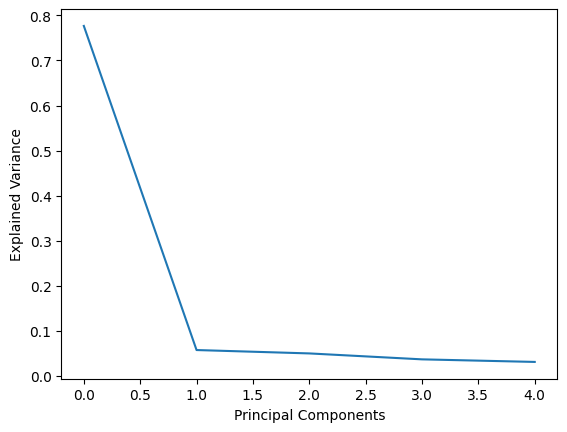

In [20]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

In [21]:
X_test = pca.transform(X_test)


In [22]:
explained_variance = pca.explained_variance_ratio_

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [25]:
y_pred = classifier.predict(X_test)


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [27]:
cm

array([[11,  2],
       [ 3,  9]])

In [28]:
acc

0.8

In [29]:
from sklearn.metrics import roc_auc_score as roc
a = roc(y_test, y_pred, average='micro')


In [30]:
a

np.float64(0.7980769230769231)

In [31]:
from sklearn.preprocessing import label_binarize

In [32]:
y = label_binarize(y, classes=[0, 1])
n_classes = y.shape[1]


In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
onehotencoder = OneHotEncoder()

In [35]:
y = onehotencoder.fit_transform(y).toarray()

In [36]:
y_test = label_binarize(y_test, classes=[0, 1])

In [37]:
onehotencoder = OneHotEncoder()
y_test = onehotencoder.fit_transform(y_test).toarray()


In [38]:
y_pred = label_binarize(y_pred, classes=[0, 1])

In [39]:
onehotencoder = OneHotEncoder()
y_pred = onehotencoder.fit_transform(y_pred).toarray()


In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [41]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


In [42]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


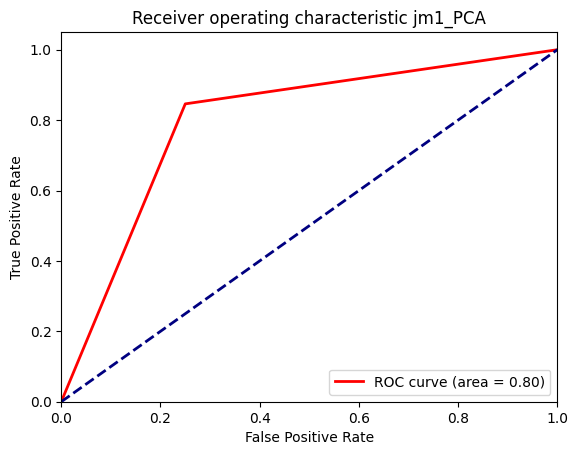

In [43]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic jm1_PCA')
plt.legend(loc="lower right")
plt.show()